In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
print(tf.__version__)

2.7.0


In [3]:
from sklearn import datasets

In [4]:
housing = datasets.load_boston()
type(housing)

sklearn.utils.Bunch

In [5]:
X_data = housing.data # 문제

In [6]:
y_data = housing.target # 답(집값)

In [7]:
y_data[:3]

array([24. , 21.6, 34.7])

In [8]:
X_data.shape

(506, 13)

In [9]:
housing.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [11]:
scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(X_data)
X_data_scaled

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_data_scaled, y_data, 
                                                    test_size=0.1, 
                                                    shuffle=True, 
                                                    random_state=11)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 13) (455,)
(51, 13) (51,)


In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [14]:
# 레이어를 순서대로 쌓을 수 있도록 객체 생성
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=13))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear')) # 회귀일때 마지막 출력층의 활성화 함수는 linear

# 쌓은 것으로 모델 세팅
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)
history

Epoch 1/100
15/15 - 0s - loss: 7.8102 - mae: 2.0644 - 16ms/epoch - 1ms/step
Epoch 2/100
15/15 - 0s - loss: 7.9208 - mae: 2.0785 - 15ms/epoch - 1ms/step
Epoch 3/100
15/15 - 0s - loss: 7.0186 - mae: 1.9396 - 16ms/epoch - 1ms/step
Epoch 4/100
15/15 - 0s - loss: 7.0119 - mae: 1.9498 - 15ms/epoch - 995us/step
Epoch 5/100
15/15 - 0s - loss: 6.8544 - mae: 1.9087 - 15ms/epoch - 1ms/step
Epoch 6/100
15/15 - 0s - loss: 7.3624 - mae: 1.9735 - 15ms/epoch - 995us/step
Epoch 7/100
15/15 - 0s - loss: 7.2371 - mae: 1.9700 - 14ms/epoch - 960us/step
Epoch 8/100
15/15 - 0s - loss: 6.9024 - mae: 1.9079 - 15ms/epoch - 994us/step
Epoch 9/100
15/15 - 0s - loss: 7.1598 - mae: 1.9601 - 14ms/epoch - 928us/step
Epoch 10/100
15/15 - 0s - loss: 6.9898 - mae: 1.9211 - 13ms/epoch - 836us/step
Epoch 11/100
15/15 - 0s - loss: 7.2821 - mae: 1.9669 - 14ms/epoch - 931us/step
Epoch 12/100
15/15 - 0s - loss: 7.0720 - mae: 1.9421 - 12ms/epoch - 798us/step
Epoch 13/100
15/15 - 0s - loss: 6.7263 - mae: 1.8784 - 13ms/epoch - 8

In [33]:
m_eval = model.evaluate(X_test, y_test)
m_eval

2/2 [==============================] - 0s 1ms/step - loss: 8.7985 - mae: 2.0850


[8.798506736755371, 2.0850400924682617]

In [35]:
print('loss: ', m_eval[0], ', mae: ', m_eval[1])

loss:  8.798506736755371 , mae:  2.0850400924682617


In [26]:
pred_test = model.predict(X_test)
pred_test[:5]

array([[22.825447],
       [12.909687],
       [26.300776],
       [24.104307],
       [ 9.072535]], dtype=float32)

In [27]:
y_test[:5]

array([23.4,  8.1, 22. , 15. , 10.4])

In [28]:
len(pred_test)

51

In [29]:
pred_test[46:]

array([[20.230038],
       [23.339739],
       [15.509999],
       [18.376457],
       [21.87706 ]], dtype=float32)

In [30]:
y_test[46:]

array([20.1, 22. , 16.7, 18.7, 19.6])

In [31]:
from sklearn.metrics import r2_score

In [32]:
R2 = r2_score(y_test, pred_test)
R2

0.88653054579727

In [37]:
history.history['mae'][:3]

[2.064399242401123, 2.078489303588867, 1.9396048784255981]

In [38]:
history.history['loss'][:3]

[7.810182094573975, 7.920812606811523, 7.018568992614746]

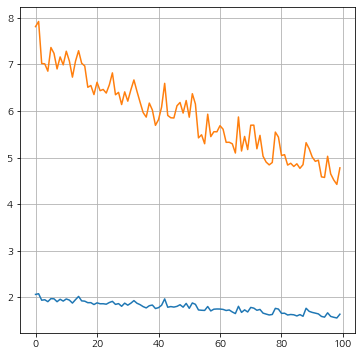

In [41]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6))
plt.plot(history.history['mae'])
plt.plot(history.history['loss'])
plt.grid()
plt.show()